### Importing Libraries and Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# creating path
path = r'C:\Users\jnyam\Documents\Global Super Store'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Global_store_sales.csv'), index_col = False)

### Data cleaning

In [5]:
df.shape

(51290, 24)

In [6]:
df.columns


Index(['Unnamed: 0', 'row_id', 'order_id', 'order_date', 'ship_date',
       'ship_mode', 'customer_id', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'total_sales'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,total_sales
0,0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,16167.550
1,1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,33384.555
2,2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,46576.539
3,3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,14462.550
4,4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,22663.680


In [8]:
df.dtypes

Unnamed: 0          int64
row_id              int64
order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_id        object
segment            object
city               object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales             float64
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
total_sales       float64
dtype: object

In [9]:
df.isnull().sum()

Unnamed: 0        0
row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
segment           0
city              0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
total_sales       0
dtype: int64

#### Extreme value checks

C:\Users\jnyam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_sales', ylabel='Density'>

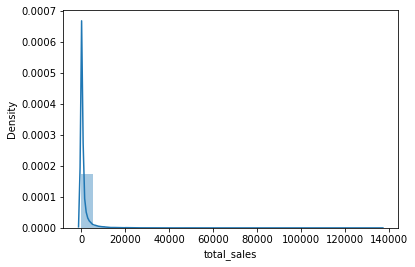

In [10]:
sns.distplot(df['total_sales'], bins=25)

C:\Users\jnyam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='shipping_cost', ylabel='Density'>

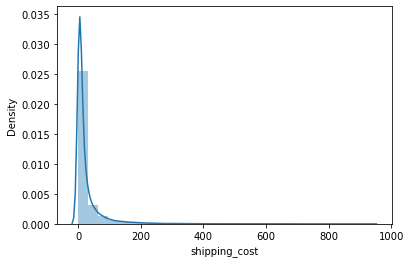

In [12]:
sns.distplot(df['shipping_cost'], bins=30)

### Data preperation for regression analysis

Hypothesis:If overall sales increase, shipping expenses will increase.

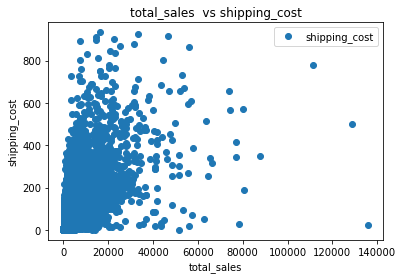

In [13]:
# Creating a scatterplot to looking for variables' relationship to be tested
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'total_sales', y='shipping_cost',style='o')
plt.title('total_sales  vs shipping_cost')  
plt.xlabel('total_sales')  
plt.ylabel('shipping_cost')  
plt.show()


In [14]:
# Reshaping the variables into NumPy arrays and putting them into separate objects
X = df['total_sales'].values.reshape(-1,1)
y = df['shipping_cost'].values.reshape(-1,1)

In [15]:
# "total sales" variable
X

array([[1.6167550e+04],
       [3.3384555e+04],
       [4.6576539e+04],
       ...,
       [6.8760000e+01],
       [2.6880000e+01],
       [1.8414000e+02]])

In [16]:
# "shipping cost" variable
y

array([[9.3357e+02],
       [9.2363e+02],
       [9.1549e+02],
       ...,
       [1.0000e-02],
       [0.0000e+00],
       [0.0000e+00]])

In [17]:
# Splitting the data into a training set and a test set by 30% of data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis

In [18]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train) # training the model

LinearRegression()

In [20]:
# Predict the values of y using X.
# Using the model on the test data set to predict some y values and see how accurate they are.

y_predicted = regression.predict(X_test) 

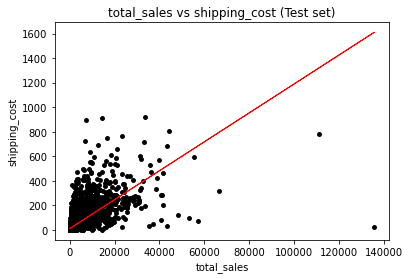

In [21]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plt.scatter(X_test, y_test, color='black', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =1)
plt.title('total_sales vs shipping_cost (Test set)')
plt.xlabel('total_sales')
plt.ylabel('shipping_cost')
plt.show()

In [22]:
# Checking the accuracy of the model - mean squared error and R2.
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
# Printing the model's summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01176452]]
Mean squared error:  1727.0334352221205
R2 score:  0.44269210239352186


The slop shows the 0.0117. It indicates how shipping cost variable changes when total sales variable changes. The mean squared error shows that there is a large average squared difference between estimated and true values. The regression model might not be the most accurate one to forecast how the two variables would interact. My model's R2 rating is 0.4426. That indicates a poor fit in my model. 

In [24]:
# Making a dataframe of y values and their predicted values to further see the performance of the model 

y_predicted

array([[ 16.79601827],
       [ 20.39984311],
       [386.13824121],
       ...,
       [ 12.39801788],
       [ 13.62383361],
       [ 15.15063277]])

In [25]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9.26,16.796018
1,9.28,20.399843
2,581.12,386.138241
3,5.96,16.705173
4,30.67,82.757977
5,1.13,12.793729
6,5.17,16.162852
7,8.68,15.630272
8,1.97,13.582893
9,0.90,12.454252


### Comparing how the regression fits the training set

In [26]:
# Comparing how the regression fits the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [27]:
# Checking the accuracy of the model.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
# Printing the model's statistics results. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.01176452]]
Mean squared error:  1713.8059756449202
R2 score:  0.4901927523271754


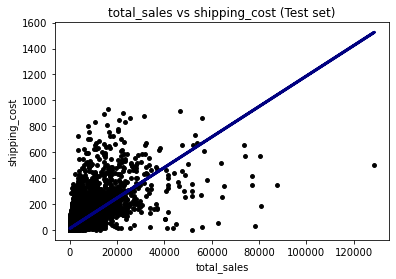

In [54]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='black', s = 15)
plot_test.plot(X_train, y_predicted_train, color='navy', linewidth =3)
plot_test.title('total_sales vs shipping_cost (Test set)')
plot_test.xlabel('total_sales')
plot_test.ylabel('shipping_cost')
plot_test.show()


There are several observations where the actual and predicted values differ significantly, but there are also some with similar values. Despite the fact that the scatterplot clearly demonstrates a strong correlation between the variables, the model's statistics indicate that the linear regression model does not appear to provide a good fit.